In [4]:
# Rosanna Bautista 1105980, Asignación 3: Redes Neuronales
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import numpy as np
import os
import pickle
import tarfile
from torch.utils.data import Dataset, DataLoader

In [5]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# Verificar que los datos se cargan correctamente
dataiter = iter(trainloader)
images, labels = next(dataiter)
print(images.shape, labels.shape)

torch.Size([64, 3, 32, 32]) torch.Size([64])


In [11]:
# Definiendo la red neuronal
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(32 * 32 * 3, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = x.view(-1, 32 * 32 * 3)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
        return x
    
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
net = NeuralNetwork().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [7]:
epochs = 20
for epoch in range(epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f'Epoch {epoch + 1}, Loss: {running_loss / len(trainloader)}')

print('Finished Training')

Epoch 1, Loss: 1.6541345962478071
Epoch 2, Loss: 1.4404324239782056
Epoch 3, Loss: 1.3216126138901771
Epoch 4, Loss: 1.227261288239218
Epoch 5, Loss: 1.1430289206449942
Epoch 6, Loss: 1.0633953413390138
Epoch 7, Loss: 0.9876131779702423
Epoch 8, Loss: 0.918517583776313
Epoch 9, Loss: 0.853454305311603
Epoch 10, Loss: 0.7885955793168539
Epoch 11, Loss: 0.7279651116608353
Epoch 12, Loss: 0.6730032740041728
Epoch 13, Loss: 0.6199737916631467
Epoch 14, Loss: 0.5762811324671101
Epoch 15, Loss: 0.5354065030546444
Epoch 16, Loss: 0.5067746211462618
Epoch 17, Loss: 0.46714051199309964
Epoch 18, Loss: 0.44718479917711
Epoch 19, Loss: 0.42183611890696504
Epoch 20, Loss: 0.39320368738964084
Finished Training


In [8]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct / total:.2f}%')

Accuracy of the network on the 10000 test images: 53.67%


## Pruebas y validaciones

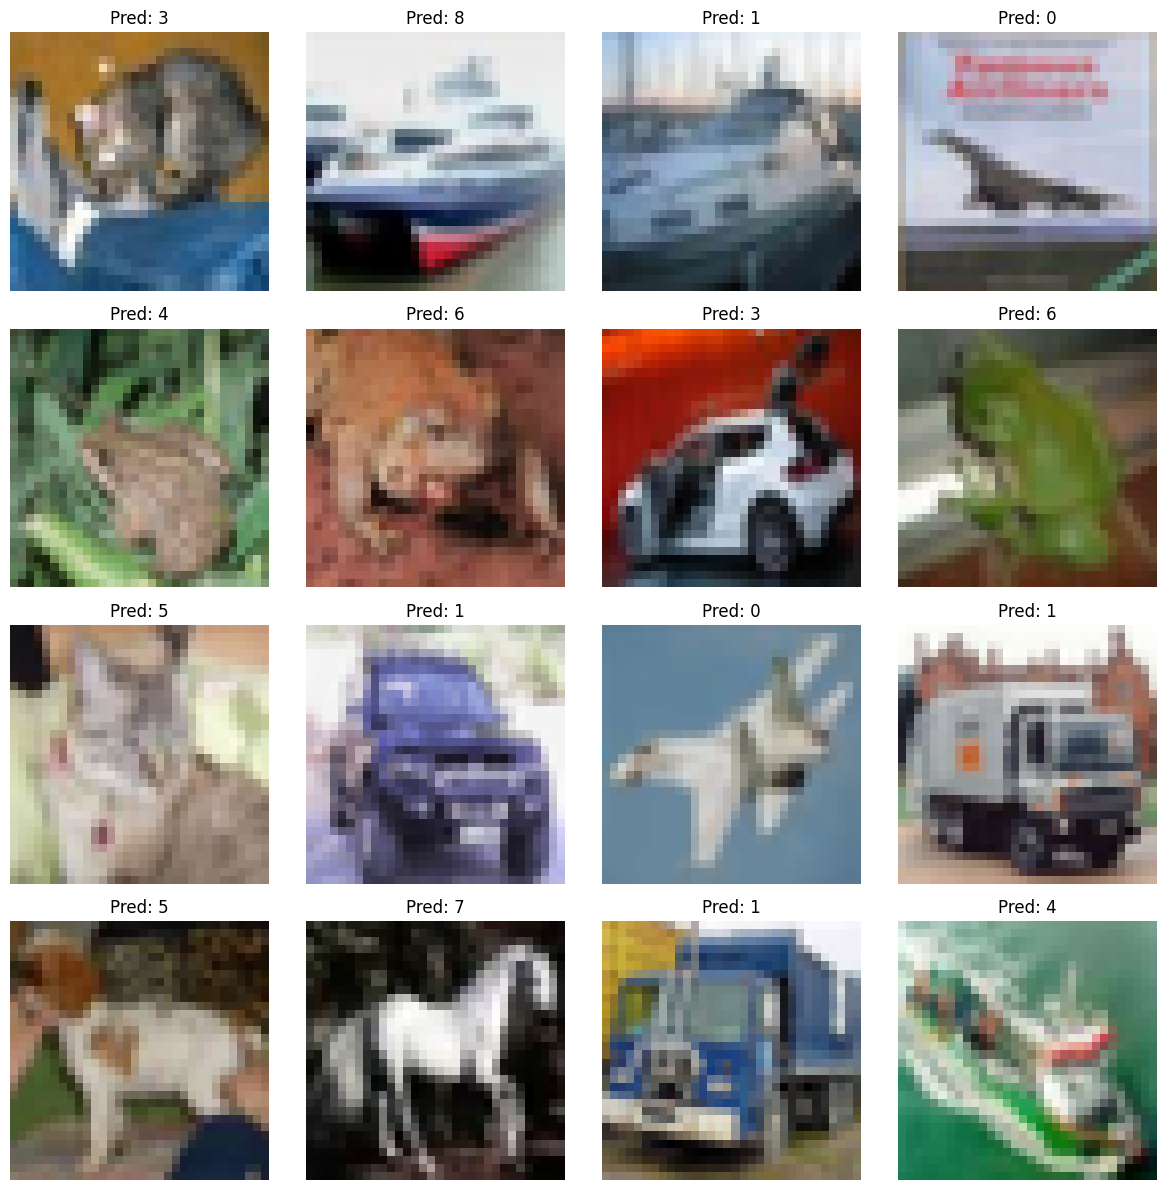

In [10]:
import matplotlib.pyplot as plt

dataiter = iter(testloader)
images, labels = next(dataiter)

images = images.to(device)
outputs = net(images)
_, predicted = torch.max(outputs, 1)

fig, axs = plt.subplots(4, 4, figsize=(12, 12))
axs = axs.ravel()
for i in range(16):
    img = images[i].cpu().numpy().transpose((1, 2, 0))
    img = img * 0.5 + 0.5  # Denormalize
    axs[i].imshow(img)
    axs[i].set_title(f'Pred: {predicted[i].item()}')
    axs[i].axis('off')

plt.tight_layout()
plt.show()